# Петрова Дарья Евгеньевна БМБ205 
## DZ 1 Немного EDA для маркетинговых данных

Вам предложены данные iFood — приложения для доставки еды в Бразилии, представленного более чем в тысяче городов.
Поддержание высокой вовлеченности клиентов является важной задачей для компании. Для того, чтобы создавать новые предложения и проводить качественные рекламные кампании, необходимо понимать особенности и потребности целевой аудитории. Для этого были собраны данные о клиентах, использующих приложение. Вам предстоит выявить особенности людей, пользующихся данным приложением и найти интересные закономерности.

Почитать про компанию можно, например, на википедии:) https://en.wikipedia.org/wiki/IFood

Описание данных:
    
* AcceptedCmp1 - 1 if customer accepted the offer in the 1st campaign, 0 otherwise
* AcceptedCmp2 - 1 if customer accepted the offer in the 2nd campaign, 0 otherwise
* AcceptedCmp3 - 1 if customer accepted the offer in the 3rd campaign, 0 otherwise
* AcceptedCmp4 - 1 if customer accepted the offer in the 4th campaign, 0 otherwise
* AcceptedCmp5 - 1 if customer accepted the offer in the 5th campaign, 0 otherwise
* Response (target) - 1 if customer accepted the offer in the last campaign, 0 otherwise
* Complain - 1 if customer complained in the last 2 years
* DtCustomer - date of customer’s enrolment with the company
* Education - customer’s level of education
* Marital - customer’s marital status
* Kidhome - number of small children in customer’s household
* Teenhome - number of teenagers in customer’s household
* Income - customer’s yearly household income
* MntFishProducts - amount spent on fish products in the last 2 years
* MntMeatProducts - amount spent on meat products in the last 2 years
* MntFruits - amount spent on fruits products in the last 2 years
* MntSweetProducts - amount spent on sweet products in the last 2 years
* MntWines - amount spent on wine products in the last 2 years
* MntGoldProds - amount spent on gold products in the last 2 years
* NumDealsPurchases - number of purchases made with discount
* NumCatalogPurchases - number of purchases made using catalogue
* NumStorePurchases - number of purchases made directly in stores
* NumWebPurchases - number of purchases made through company’s web site
* NumWebVisitsMonth - number of visits to company’s web site in the last month
* Recency - number of days since the last purchase

## Немного важной информации:

1. Обязательно гуглите! Использование дополнительных методов не карается, но приветствуется (если вы сможете объяснить принцип их работы) Однако, если вы нашли что-то полезное и хотите скопировать себе - сделав это, добавьте в начале ячейки ссылку на источник. В противном случае это будет считаться плагиатом.

2. Плагиат не допускается и строго наказывается. Единственное возможное исключение - код, заимствованный из интернета, с ссылкой на источник.

# Задание 1 (1 балл): предобработка данных

* **Откройте предложенные данные.**

In [1]:
import pandas as pd
df = pd.read_csv("marketing.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 28 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   ID                   2240 non-null   int64 
 1   Year_Birth           2240 non-null   int64 
 2   Education            2240 non-null   object
 3   Marital_Status       2240 non-null   object
 4   Income               2216 non-null   object
 5   Kidhome              2240 non-null   int64 
 6   Teenhome             2240 non-null   int64 
 7   Dt_Customer          2240 non-null   object
 8   Recency              2240 non-null   int64 
 9   MntWines             2240 non-null   int64 
 10  MntFruits            2240 non-null   int64 
 11  MntMeatProducts      2240 non-null   int64 
 12  MntFishProducts      2240 non-null   int64 
 13  MntSweetProducts     2240 non-null   int64 
 14  MntGoldProds         2240 non-null   int64 
 15  NumDealsPurchases    2240 non-null   int64 
 16  NumWeb

In [2]:
import numpy as np

* **Изучите ваши данные. Какие типы данных здесь представлены? Все ли данные считались в корректном и удобном для работы формате? Если нет, то с какими данными есть проблемы?**

In [3]:
df.shape

(2240, 28)

In [4]:
df.dtypes

ID                      int64
Year_Birth              int64
Education              object
Marital_Status         object
Income                 object
Kidhome                 int64
Teenhome                int64
Dt_Customer            object
Recency                 int64
MntWines                int64
MntFruits               int64
MntMeatProducts         int64
MntFishProducts         int64
MntSweetProducts        int64
MntGoldProds            int64
NumDealsPurchases       int64
NumWebPurchases         int64
NumCatalogPurchases     int64
NumStorePurchases       int64
NumWebVisitsMonth       int64
AcceptedCmp3            int64
AcceptedCmp4            int64
AcceptedCmp5            int64
AcceptedCmp1            int64
AcceptedCmp2            int64
Response                int64
Complain                int64
Country                object
dtype: object

In [5]:
df.head() #для наглядности для себя выведу пять первых строк таблицы

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country
0,1826,1970,Graduation,Divorced,"$84,835.00",0,0,6/16/14,0,189,...,6,1,0,0,0,0,0,1,0,SP
1,1,1961,Graduation,Single,"$57,091.00",0,0,6/15/14,0,464,...,7,5,0,0,0,0,1,1,0,CA
2,10476,1958,Graduation,Married,"$67,267.00",0,1,5/13/14,0,134,...,5,2,0,0,0,0,0,0,0,US
3,1386,1967,Graduation,Together,"$32,474.00",1,1,5/11/14,0,10,...,2,7,0,0,0,0,0,0,0,AUS
4,5371,1989,Graduation,Single,"$21,474.00",1,0,4/8/14,0,6,...,2,7,1,0,0,0,0,1,0,SP


Итак, по данным видно:

1) есть 2240 строчек и 28 столбцов с данными. (из df.shape)

2) по всем столбцам заполнено 2240 строк (из df.info())

Взглянем подробнее на представленные типы данных:

1) Здесь два типа данных - int64 и object. int64 - целые числа, object - текстовые или смешанные числовые или нечисловые данные.

2) Замечу, что данные в столбце Income считались в формате object, скорее всего, это будет неудобно для дальнейшего анализа данных, так как "заработок" измеряется в целых числах. Кроме того Dt_customer имеет формат object, вместо datetime.

* **Теперь необходимо привести некоторые данные в корректный вид. Преобразуйте признак income так, чтобы значения этого признака были обычными вещественными числами (float)**

Сначала я написала код, который убирал "$" и "," но мне была выдана ошибка поэтому для дальнейшего выполнения этого задания мне пришлось честно пойти в интернет. Вот ссылка, которой я пользовалась при написании кода https://colab.research.google.com/github/dm-fedorov/pandas_basic/blob/master/%D0%B1%D1%8B%D1%81%D1%82%D1%80%D0%BE%D0%B5%20%D0%B2%D0%B2%D0%B5%D0%B4%D0%B5%D0%BD%D0%B8%D0%B5%20%D0%B2%20pandas/%D0%9E%D1%87%D0%B8%D1%81%D1%82%D0%BA%D0%B0%20%D0%B4%D0%B0%D0%BD%D0%BD%D1%8B%D1%85%20%D0%BE%20%D0%B2%D0%B0%D0%BB%D1%8E%D1%82%D0%B5%20%D1%81%20%D0%BF%D0%BE%D0%BC%D0%BE%D1%89%D1%8C%D1%8E%20pandas.ipynb#scrollTo=Bv3QtF4qr15C

In [6]:
df['Income'].apply(type).value_counts() 
#я узнала, что в Income лежат не только данные типа str но и float, видимо из-за этого в моем изначальном коде была ошибка.
#значит надо написать функцию, которая будет делать преобразования только с str, а float будет просто возвращать

<class 'str'>      2216
<class 'float'>      24
Name: Income, dtype: int64

In [7]:
def fixing(x):
    if isinstance(x, str):
        return (x.replace('$', '').replace(',', ''))
    return(x)

In [8]:
df['Income']=df['Income'].apply(fixing).astype('float')
df['Income'].dtypes

dtype('float64')

Теперь все данные из Income в формате float

На всякий случай проверю, что все ID уникальны, чтобы не было задвоения данных

In [9]:
len(df.ID.unique()) == df.shape[0]

True

Замечательно, дублированных ID нет. 

* **Кроме того, даты нам было бы удобнее представить в корректном формате ГГГГ-ММ-ДД. Преобразуйте данные с датами в соответствующий вид.**

In [10]:
df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer']) #преобразовала даты в ГГГ-ММ-ДД

Я решила провести дополнительную проверку, посмотреть, все ли ID уникальны, чтобы не было задваоения данных

In [11]:
len(df.ID.unique()) == df.shape[0]

True

Замечательно, дублированных ID нет

In [12]:
df.dtypes

ID                              int64
Year_Birth                      int64
Education                      object
Marital_Status                 object
Income                        float64
Kidhome                         int64
Teenhome                        int64
Dt_Customer            datetime64[ns]
Recency                         int64
MntWines                        int64
MntFruits                       int64
MntMeatProducts                 int64
MntFishProducts                 int64
MntSweetProducts                int64
MntGoldProds                    int64
NumDealsPurchases               int64
NumWebPurchases                 int64
NumCatalogPurchases             int64
NumStorePurchases               int64
NumWebVisitsMonth               int64
AcceptedCmp3                    int64
AcceptedCmp4                    int64
AcceptedCmp5                    int64
AcceptedCmp1                    int64
AcceptedCmp2                    int64
Response                        int64
Complain    

Дальше я задумалась, какие именно данные лежат в категориальных переменных Education, Marital_Status, Country. Может быть, их можно/нужно как-то преобразовать или оптимизировать

In [13]:
df['Education'].unique()

array(['Graduation', 'PhD', '2n Cycle', 'Master', 'Basic'], dtype=object)

In [14]:
df['Education'].value_counts().head()

Graduation    1127
PhD            486
Master         370
2n Cycle       203
Basic           54
Name: Education, dtype: int64

Немного погуглив о ступенях образования, я выяснила, что 2n Cycle и Master - одно и то же, поэтому мне кажется, что будет правильно объединить их. Для этого я заменю все "2n Cycle" на "Master"
Что касается остальных ступеней - везде было по разному написано, поэтому я не стала их изменять

In [15]:
df.loc[df['Education'] == '2n Cycle', 'Education'] = 'Master' #о функции .loc я узнала вот здесь https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.loc.html
df.Education.unique()

array(['Graduation', 'PhD', 'Master', 'Basic'], dtype=object)

Далее проверяю Marital_Status

In [16]:
df['Marital_Status'].unique()

array(['Divorced', 'Single', 'Married', 'Together', 'Widow', 'YOLO',
       'Alone', 'Absurd'], dtype=object)

In [17]:
df['Marital_Status'].value_counts()

Married     864
Together    580
Single      480
Divorced    232
Widow        77
Alone         3
YOLO          2
Absurd        2
Name: Marital_Status, dtype: int64

Married и Together все-таки имеют разную смысловую нагрузку, их не трогаем, а вот Single и Alone - одно и то же, объединим их в "Single". Кроме того, YOLO (you only live once) и Absurd на фоне остальных встречаются мало, всего по два раза, и не дают никакой конкретики для интерпретации данных, поэтому я решила удалить строки, содержащие эти категории. Удалить, а не заменить на что-то, потому что я считаю, что людям, которые написали в "отношениях" "yolo/absurd", нельзя доверять, нет гарантии, что остальные графы были заполнены честно, а не наугад, поэтому я не хочу, чтобы эти несколько строк хоть как-то влияли на дальнейший анализ.

In [18]:
df.loc[df['Marital_Status'] == 'Alone', 'Marital_Status'] = 'Single'

In [19]:
df.loc[df['Marital_Status'] == 'YOLO', 'Marital_Status'] = np.nan #np.nan для того, чтобы удалить потом строки через dropna
df.loc[df['Marital_Status'] == 'Absurd', 'Marital_Status'] = np.nan

Теперь посмотрим данные по странам

In [20]:
df['Country'].unique()

array(['SP', 'CA', 'US', 'AUS', 'GER', 'IND', 'SA', 'ME'], dtype=object)

In [21]:
df['Country'].value_counts()

SP     1095
SA      337
CA      268
AUS     160
IND     148
GER     120
US      109
ME        3
Name: Country, dtype: int64

ME - Montenegro. Несмотря на малое количество данных по Черногории, я решила оставить их, потому что возможно при дальнейшей работе мне будет полезно посмотреть именно на эту страну.

## Задание 2 (1.5 балла): пропуски и выбросы

* **Исследуйте данные на предмет пропусков и выбросов. Есть ли в данных пропуски? Сколько и в каких признаках? Как вы будете их обрабатывать? Обработайте пропуски, пояснив выбранную вами стратегию обработки.**

**_важно: просто удалить - это не стратегия обработки, придумайте что-то другое_**

In [22]:
#сначала проверю данные на предмет пропусков, посмотрю суммарное количество пропусков по столбцам
df.isnull().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          4
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Response                0
Complain                0
Country                 0
dtype: int64

4 пропуска в Marital_Status, которые я ранее сама добавила. Эти строки я удалить могу. 
24 пропуска в Income просто удалить нельзя, можно было бы заполнить пропуски средним значением, модой или медианой, но поскольку в данных возможно есть выбросы, нужно заполнить пропуск чем-то устойчивым к выбросам - медианой.  

In [23]:
df['Income'] = df['Income'].fillna(df['Income'].median())

In [24]:
df = df.dropna() #сейчас удалятся только данные, где 4 пропуска

In [25]:
#проверю что пропусков теперь правда нет
df.isnull().sum()

ID                     0
Year_Birth             0
Education              0
Marital_Status         0
Income                 0
Kidhome                0
Teenhome               0
Dt_Customer            0
Recency                0
MntWines               0
MntFruits              0
MntMeatProducts        0
MntFishProducts        0
MntSweetProducts       0
MntGoldProds           0
NumDealsPurchases      0
NumWebPurchases        0
NumCatalogPurchases    0
NumStorePurchases      0
NumWebVisitsMonth      0
AcceptedCmp3           0
AcceptedCmp4           0
AcceptedCmp5           0
AcceptedCmp1           0
AcceptedCmp2           0
Response               0
Complain               0
Country                0
dtype: int64

* **Исследуйте данные на предмет выбросов и удалите их, если они есть. Если выбросы есть - продемонстрируйте это численно и с помощью визуализаций. Прокомментируйте, как вы ищете выбросы, и почему их стоит удалить.**

Для начала я посмотрю на наличие выбросов с помощью "ящика с усами" и рассчитаю 1 и 3 квартили, межквартильное расстояние, минимум и максимум. Я использую данный способ, потому что он наиболее понятный, простой и эффективный для меня при работе с выбросами.

In [26]:
import seaborn as sns
import matplotlib.pyplot as plt

In [27]:
import warnings

1. Для Year_Birth

Text(0.5, 1.0, 'boxplot for year of birth')

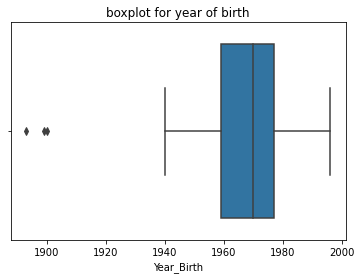

In [29]:
sns.boxplot(df['Year_Birth']);
warnings.filterwarnings('ignore')
plt.title('boxplot for year of birth')

In [30]:
q25_Year_Birth = np.quantile(df['Year_Birth'], 0.25)
q75_Year_Birth = np.quantile(df['Year_Birth'], 0.75)
IQR_Year_Birth = q75_Year_Birth - q25_Year_Birth
min_Year_Birth = q25_Year_Birth - (1.5*IQR_Year_Birth)
max_Year_Birth = q75_Year_Birth + (1.5*IQR_Year_Birth)

In [31]:
print(q25_Year_Birth)
print(q75_Year_Birth)
print(IQR_Year_Birth)
print(min_Year_Birth)
print(max_Year_Birth)

1959.0
1977.0
18.0
1932.0
2004.0


По графику видно, что у нас есть выбросы, при чем в районе 1900 года рождения. Я удалю все выбросы, потому что вероятность того, что малое количество людей действительно родились так давно, ничтожно мала.

Избавляться от выбросов я буду с помощью функции .loc задав условия >max и <min, преобразовав выбросы сначала в NaN, а потом дропнув их

In [32]:
df.loc[df['Year_Birth'] < min_Year_Birth, 'Year_Birth'] = np.nan
df.loc[df['Year_Birth'] > max_Year_Birth, 'Year_Birth'] = np.nan

In [33]:
df.isnull().sum()

ID                     0
Year_Birth             3
Education              0
Marital_Status         0
Income                 0
Kidhome                0
Teenhome               0
Dt_Customer            0
Recency                0
MntWines               0
MntFruits              0
MntMeatProducts        0
MntFishProducts        0
MntSweetProducts       0
MntGoldProds           0
NumDealsPurchases      0
NumWebPurchases        0
NumCatalogPurchases    0
NumStorePurchases      0
NumWebVisitsMonth      0
AcceptedCmp3           0
AcceptedCmp4           0
AcceptedCmp5           0
AcceptedCmp1           0
AcceptedCmp2           0
Response               0
Complain               0
Country                0
dtype: int64

Теперь повторю все то же самое для других колонок

2. Для Income

Text(0.5, 1.0, 'boxplot for Income')

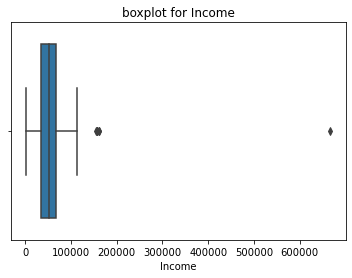

In [34]:
sns.boxplot(df['Income']);
plt.title('boxplot for Income')

In [35]:
q25_Income = np.quantile(df['Income'], 0.25)
q75_Income = np.quantile(df['Income'], 0.75)
IQR_Income = q75_Income - q25_Income
min_Income = q25_Income - (1.5*IQR_Income)
max_Income = q75_Income + (1.5*IQR_Income)

In [36]:
print(q25_Income)
print(q75_Income)
print(IQR_Income)
print(min_Income)
print(max_Income)

35502.5
68289.75
32787.25
-13678.375
117470.625


Здесь тоже избавлюсь от выбросов целиком, так как их не так много, чтобы придавать им особое значение

In [37]:
df.loc[df['Income'] < min_Income, 'Income'] = np.nan
df.loc[df['Income'] > max_Income, 'Income'] = np.nan

3. Для Kidhome

Text(0.5, 1.0, 'boxplot for kids at home')

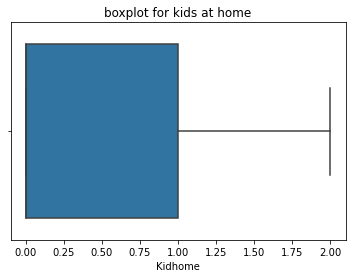

In [38]:
sns.boxplot(df['Kidhome']);
plt.title('boxplot for kids at home')

In [39]:
q25_Kidhome = np.quantile(df['Kidhome'], 0.25)
q75_Kidhome = np.quantile(df['Kidhome'], 0.75)
IQR_Kidhome = q75_Kidhome - q25_Kidhome
min_Kidhome = q25_Kidhome - (1.5*IQR_Kidhome)
max_Kidhome = q75_Kidhome + (1.5*IQR_Kidhome)

In [40]:
print(q25_Kidhome)
print(q75_Kidhome)
print(IQR_Kidhome)
print(min_Kidhome)
print(max_Kidhome)

0.0
1.0
1.0
-1.5
2.5


In [41]:
df.loc[df['Kidhome'] < min_Kidhome, 'Kidhome'] = np.nan
df.loc[df['Kidhome'] > max_Kidhome, 'Kidhome'] = np.nan

4. Для Teenhome

Text(0.5, 1.0, 'boxplot for teens at home')

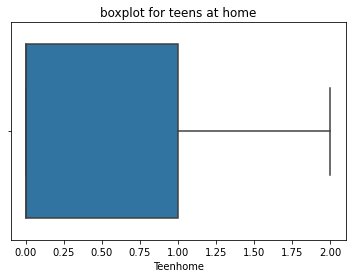

In [42]:
sns.boxplot(df['Teenhome']);
plt.title('boxplot for teens at home')

In [43]:
q25_Teenhome = np.quantile(df['Teenhome'], 0.25)
q75_Teenhome = np.quantile(df['Teenhome'], 0.75)
IQR_Teenhome = q75_Teenhome - q25_Teenhome
min_Teenhome = q25_Teenhome - (1.5*IQR_Teenhome)
max_Teenhome = q75_Teenhome + (1.5*IQR_Teenhome)

In [44]:
print(q25_Teenhome)
print(q75_Teenhome)
print(IQR_Teenhome)
print(min_Teenhome)
print(max_Teenhome)

0.0
1.0
1.0
-1.5
2.5


In [45]:
df.loc[df['Teenhome'] < min_Kidhome, 'Teenhome'] = np.nan
df.loc[df['Teenhome'] > max_Kidhome, 'Teenhome'] = np.nan

Вообще, на графике видно что выбросов у Kidhome и Teenhome нет, но я на всякий случай все равно прописала код дальше

5. Для Recency

Text(0.5, 1.0, 'boxplot for recency')

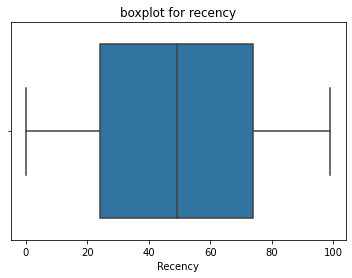

In [46]:
sns.boxplot(df['Recency']);
plt.title('boxplot for recency')

In [47]:
q25_Recency = np.quantile(df['Recency'], 0.25)
q75_Recency = np.quantile(df['Recency'], 0.75)
IQR_Recency = q75_Recency - q25_Recency
min_Recency = q25_Recency - (1.5*IQR_Recency)
max_Recency = q75_Recency + (1.5*IQR_Recency)

In [48]:
print(q25_Recency)
print(q75_Recency)
print(IQR_Recency)
print(min_Recency)
print(max_Recency)

24.0
74.0
50.0
-51.0
149.0


In [49]:
df.loc[df['Recency'] < min_Recency, 'Recency'] = np.nan
df.loc[df['Recency'] > max_Recency, 'Recency'] = np.nan

6. Для MntWines

Text(0.5, 1.0, 'boxplot for amount of money spent on wine')

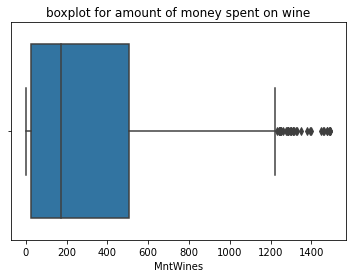

In [50]:
sns.boxplot(df['MntWines']);
plt.title('boxplot for amount of money spent on wine')

In [51]:
q25_MntWines = np.quantile(df['MntWines'], 0.25)
q75_MntWines = np.quantile(df['MntWines'], 0.75)
IQR_MntWines = q75_MntWines - q25_MntWines
min_MntWines = q25_MntWines - (1.5*IQR_MntWines)
max_MntWines = q75_MntWines + (1.5*IQR_MntWines)

In [52]:
print(q25_MntWines)
print(q75_MntWines)
print(IQR_MntWines)
print(min_MntWines)
print(max_MntWines)

23.0
505.0
482.0
-700.0
1228.0


Вот здесь уже интереснее, посмотрю на график плотности распределения

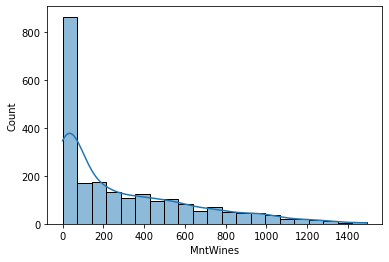

In [53]:
sns.histplot(df['MntWines'], kde = True);

Я считаю, что значения c 1000 до 1400 нужно оставить, так как у них примерно одинаковая плотность распределения, то есть значения с 1228 до 1400 не выбросы, а "длинный хвост", значения которого я считаю релевантными. Выбросы - все значения выше 1400 

In [54]:
df.loc[df['MntWines'] < min_MntWines, 'MntWines'] = np.nan
df.loc[df['MntWines'] > 1400, 'MntWines'] = np.nan

7. Для MntFruits

Text(0.5, 1.0, 'boxplot for amount of money spent on fruits')

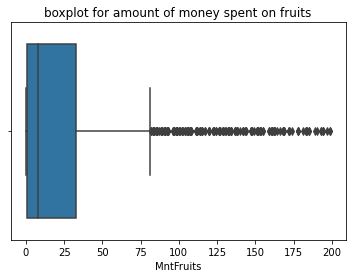

In [55]:
sns.boxplot(df['MntFruits']);
plt.title('boxplot for amount of money spent on fruits')

In [56]:
q25_MntFruits = np.quantile(df['MntFruits'], 0.25)
q75_MntFruits = np.quantile(df['MntFruits'], 0.75)
IQR_MntFruits = q75_MntFruits - q25_MntFruits
min_MntFruits = q25_MntFruits - (1.5*IQR_MntFruits)
max_MntFruits = q75_MntFruits + (1.5*IQR_MntFruits)

In [57]:
print(q25_MntFruits)
print(q75_MntFruits)
print(IQR_MntFruits)
print(min_MntFruits)
print(max_MntFruits)

1.0
33.0
32.0
-47.0
81.0


Ясно, смотрим на график плотности распределения

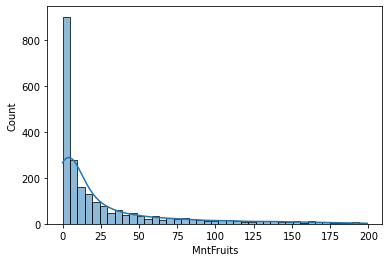

In [58]:
sns.histplot(df['MntFruits'], kde = True);

Как и с вином, я считаю, что весь хвост отрезать нельзя, поэтому выбросами буду считать все значения >155

In [59]:
df.loc[df['MntFruits'] < min_MntFruits, 'MntFruits'] = np.nan
df.loc[df['MntFruits'] > 155, 'MntFruits'] = np.nan

8. Для MntMeatProducts

Text(0.5, 1.0, 'boxplot for amount of money spent on meat')

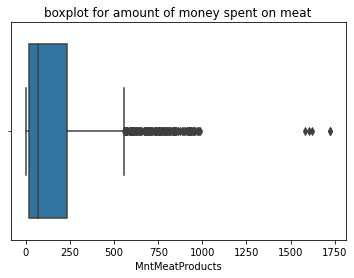

In [60]:
sns.boxplot(df['MntMeatProducts']);
plt.title('boxplot for amount of money spent on meat')

In [61]:
q25_MntMeatProducts = np.quantile(df['MntMeatProducts'], 0.25)
q75_MntMeatProducts = np.quantile(df['MntMeatProducts'], 0.75)
IQR_MntMeatProducts = q75_MntMeatProducts - q25_MntMeatProducts
min_MntMeatProducts = q25_MntMeatProducts - (1.5*IQR_MntMeatProducts)
max_MntMeatProducts = q75_MntMeatProducts + (1.5*IQR_MntMeatProducts)

In [62]:
print(q25_MntMeatProducts)
print(q75_MntMeatProducts)
print(IQR_MntMeatProducts)
print(min_MntMeatProducts)
print(max_MntMeatProducts)

16.0
232.0
216.0
-308.0
556.0


Невооруженным глазом видно, что значения >1000 сильно далеко от максимума, значит, приму их за выбросы. Значения до 1000 за выбросы принимать не буду, они очень плотно распределены

In [63]:
df.loc[df['MntMeatProducts'] < min_MntMeatProducts, 'MntMeatProducts'] = np.nan
df.loc[df['MntMeatProducts'] > 1000, 'MntMeatProducts'] = np.nan

9. Для MntFishProducts

Text(0.5, 1.0, 'boxplot for amount of money spent on fish')

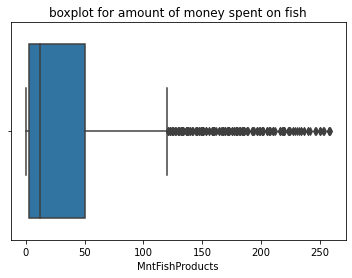

In [64]:
sns.boxplot(df['MntFishProducts']);
plt.title('boxplot for amount of money spent on fish')

In [65]:
q25_MntFishProducts = np.quantile(df['MntFishProducts'], 0.25)
q75_MntFishProducts = np.quantile(df['MntFishProducts'], 0.75)
IQR_MntFishProducts = q75_MntFishProducts - q25_MntFishProducts
min_MntFishProducts = q25_MntFishProducts - (1.5*IQR_MntFishProducts)
max_MntFishProducts = q75_MntFishProducts + (1.5*IQR_MntFishProducts)

In [66]:
print(q25_MntFishProducts)
print(q75_MntFishProducts)
print(IQR_MntFishProducts)
print(min_MntFishProducts)
print(max_MntFishProducts)

3.0
50.0
47.0
-67.5
120.5


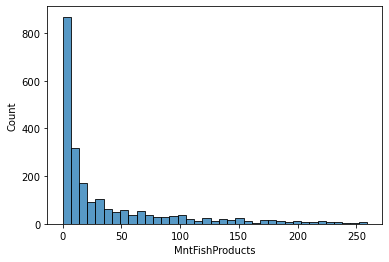

In [67]:
sns.histplot(df['MntFishProducts']);

Аналогично, я считаю, что выбросы идут с 200, а до этого важные для анализа значения

In [68]:
df.loc[df['MntFishProducts'] < min_MntFishProducts, 'MntFishProducts'] = np.nan
df.loc[df['MntFishProducts'] > 200, 'MntFishProducts'] = np.nan

10. Для MntSweetProducts

Text(0.5, 1.0, 'boxplot for amount of money spent on sweets')

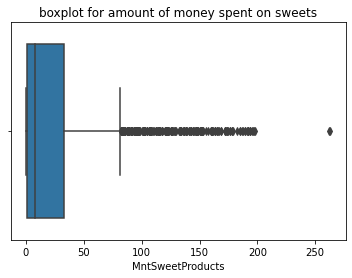

In [69]:
sns.boxplot(df['MntSweetProducts']);
plt.title('boxplot for amount of money spent on sweets')

In [70]:
q25_MntSweetProducts = np.quantile(df['MntSweetProducts'], 0.25)
q75_MntSweetProducts = np.quantile(df['MntSweetProducts'], 0.75)
IQR_MntSweetProducts = q75_MntSweetProducts - q25_MntSweetProducts
min_MntSweetProducts = q25_MntSweetProducts - (1.5*IQR_MntSweetProducts)
max_MntSweetProducts = q75_MntSweetProducts + (1.5*IQR_MntSweetProducts)

In [71]:
print(q25_MntSweetProducts)
print(q75_MntSweetProducts)
print(IQR_MntSweetProducts)
print(min_MntSweetProducts)
print(max_MntSweetProducts)

1.0
33.0
32.0
-47.0
81.0


Все, что после 200 - выбросы, до 200 - плотный хвост

In [72]:
df.loc[df['MntSweetProducts'] < min_MntSweetProducts, 'MntSweetProducts'] = np.nan
df.loc[df['MntSweetProducts'] > 200, 'MntSweetProducts'] = np.nan

11. Для MntGoldProds

Text(0.5, 1.0, 'boxplot for amount of money spent on gold')

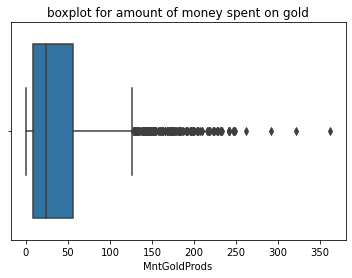

In [73]:
sns.boxplot(df['MntGoldProds']);
plt.title('boxplot for amount of money spent on gold')

In [74]:
q25_MntGoldProds = np.quantile(df['MntGoldProds'], 0.25)
q75_MntGoldProds = np.quantile(df['MntGoldProds'], 0.75)
IQR_MntGoldProds = q75_MntGoldProds - q25_MntGoldProds
min_MntGoldProds = q25_MntGoldProds - (1.5*IQR_MntGoldProds)
max_MntGoldProds = q75_MntGoldProds + (1.5*IQR_MntGoldProds)

In [75]:
print(q25_MntGoldProds)
print(q75_MntGoldProds)
print(IQR_MntGoldProds)
print(min_MntGoldProds)
print(max_MntGoldProds)

9.0
56.0
47.0
-61.5
126.5


Выбросы начинаются после 250

In [76]:
df.loc[df['MntGoldProds'] < min_MntGoldProds, 'MntGoldProds'] = np.nan
df.loc[df['MntGoldProds'] > 250, 'MntGoldProds'] = np.nan

12. Для NumDealsPurchases

Text(0.5, 1.0, 'boxplot for number of deals purchases')

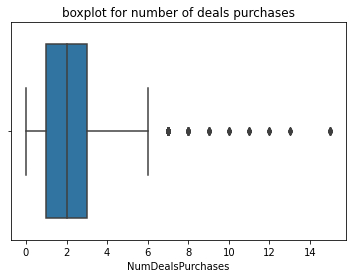

In [77]:
sns.boxplot(df['NumDealsPurchases']);
plt.title('boxplot for number of deals purchases')

In [78]:
q25_NumDealsPurchases = np.quantile(df['NumDealsPurchases'], 0.25)
q75_NumDealsPurchases = np.quantile(df['NumDealsPurchases'], 0.75)
IQR_NumDealsPurchases = q75_NumDealsPurchases - q25_NumDealsPurchases
min_NumDealsPurchases = q25_NumDealsPurchases - (1.5*IQR_NumDealsPurchases)
max_NumDealsPurchases = q75_NumDealsPurchases + (1.5*IQR_NumDealsPurchases)

In [79]:
print(q25_NumDealsPurchases)
print(q75_NumDealsPurchases)
print(IQR_NumDealsPurchases)
print(min_NumDealsPurchases)
print(max_NumDealsPurchases)

1.0
3.0
2.0
-2.0
6.0


Тут видно, выбросы - все значения после максимального

In [80]:
df.loc[df['NumDealsPurchases'] < min_NumDealsPurchases, 'NumDealsPurchases'] = np.nan
df.loc[df['NumDealsPurchases'] > max_NumDealsPurchases, 'NumDealsPurchases'] = np.nan

13. Для NumWebPurchases

Text(0.5, 1.0, 'boxplot for number of web purchases')

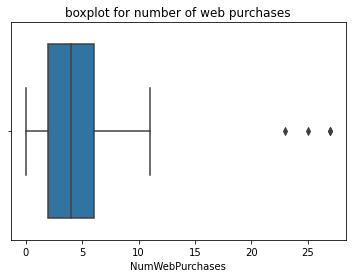

In [81]:
sns.boxplot(df['NumWebPurchases']);
plt.title('boxplot for number of web purchases')

In [82]:
q25_NumWebPurchases = np.quantile(df['NumWebPurchases'], 0.25)
q75_NumWebPurchases = np.quantile(df['NumWebPurchases'], 0.75)
IQR_NumWebPurchases = q75_NumWebPurchases - q25_NumWebPurchases
min_NumWebPurchases = q25_NumWebPurchases - (1.5*IQR_NumWebPurchases)
max_NumWebPurchases = q75_NumWebPurchases + (1.5*IQR_NumWebPurchases)

In [83]:
print(q25_NumWebPurchases)
print(q75_NumWebPurchases)
print(IQR_NumWebPurchases)
print(min_NumWebPurchases)
print(max_NumWebPurchases)

2.0
6.0
4.0
-4.0
12.0


Выбросы после максимума

In [84]:
df.loc[df['NumWebPurchases'] < min_NumWebPurchases, 'NumWebPurchases'] = np.nan
df.loc[df['NumWebPurchases'] > max_NumWebPurchases, 'NumWebPurchases'] = np.nan

14. Для NumCatalogPurchases

Text(0.5, 1.0, 'boxplot for number of catalog purchases')

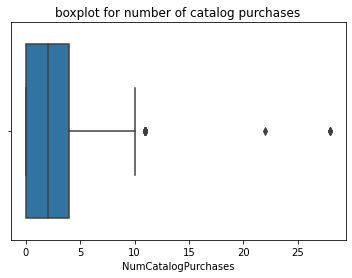

In [85]:
sns.boxplot(df['NumCatalogPurchases']);
plt.title('boxplot for number of catalog purchases')

In [86]:
q25_NumCatalogPurchases = np.quantile(df['NumCatalogPurchases'], 0.25)
q75_NumCatalogPurchases = np.quantile(df['NumCatalogPurchases'], 0.75)
IQR_NumCatalogPurchases = q75_NumCatalogPurchases - q25_NumCatalogPurchases
min_NumCatalogPurchases = q25_NumCatalogPurchases - (1.5*IQR_NumCatalogPurchases)
max_NumCatalogPurchases = q75_NumCatalogPurchases + (1.5*IQR_NumCatalogPurchases)

In [87]:
print(q25_NumCatalogPurchases)
print(q75_NumCatalogPurchases)
print(IQR_NumCatalogPurchases)
print(min_NumCatalogPurchases)
print(max_NumCatalogPurchases)

0.0
4.0
4.0
-6.0
10.0


Здесь тоже выбросы после максимума

In [88]:
df.loc[df['NumCatalogPurchases'] < min_NumCatalogPurchases, 'NumCatalogPurchases'] = np.nan
df.loc[df['NumCatalogPurchases'] > max_NumCatalogPurchases, 'NumCatalogPurchases'] = np.nan

15. Для NumStorePurchases

Text(0.5, 1.0, 'boxplot for number of store purchases')

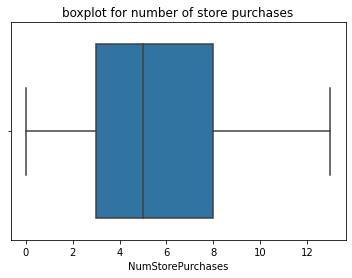

In [89]:
sns.boxplot(df['NumStorePurchases']);
plt.title('boxplot for number of store purchases')

In [90]:
q25_NumStorePurchases = np.quantile(df['NumStorePurchases'], 0.25)
q75_NumStorePurchases = np.quantile(df['NumStorePurchases'], 0.75)
IQR_NumStorePurchases = q75_NumStorePurchases - q25_NumStorePurchases
min_NumStorePurchases = q25_NumStorePurchases - (1.5*IQR_NumStorePurchases)
max_NumStorePurchases = q75_NumStorePurchases + (1.5*IQR_NumStorePurchases)

In [91]:
print(q25_NumStorePurchases)
print(q75_NumStorePurchases)
print(IQR_NumStorePurchases)
print(min_NumStorePurchases)
print(max_NumStorePurchases)

3.0
8.0
5.0
-4.5
15.5


In [92]:
df.loc[df['NumStorePurchases'] < min_NumStorePurchases, 'NumStorePurchases'] = np.nan
df.loc[df['NumStorePurchases'] > max_NumStorePurchases, 'NumStorePurchases'] = np.nan

16. Для NumWebVisitsMonth

Text(0.5, 1.0, 'boxplot for number of web visits')

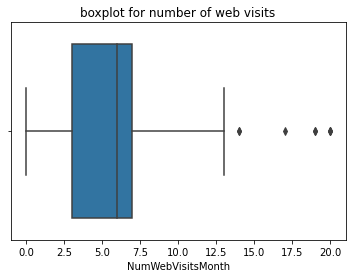

In [93]:
sns.boxplot(df['NumWebVisitsMonth']);
plt.title('boxplot for number of web visits')

In [94]:
q25_NumWebVisitsMonth = np.quantile(df['NumWebVisitsMonth'], 0.25)
q75_NumWebVisitsMonth = np.quantile(df['NumWebVisitsMonth'], 0.75)
IQR_NumWebVisitsMonth = q75_NumWebVisitsMonth - q25_NumWebVisitsMonth
min_NumWebVisitsMonth = q25_NumWebVisitsMonth - (1.5*IQR_NumWebVisitsMonth)
max_NumWebVisitsMonth = q75_NumWebVisitsMonth + (1.5*IQR_NumWebVisitsMonth)

In [95]:
print(q25_NumWebVisitsMonth)
print(q75_NumWebVisitsMonth)
print(IQR_NumWebVisitsMonth)
print(min_NumWebVisitsMonth)
print(max_NumWebVisitsMonth)

3.0
7.0
4.0
-3.0
13.0


In [96]:
q25_NumWebVisitsMonth = np.quantile(df['NumWebVisitsMonth'], 0.25)
q75_NumWebVisitsMonth = np.quantile(df['NumWebVisitsMonth'], 0.75)
IQR_NumWebVisitsMonth = q75_NumWebVisitsMonth - q25_NumWebVisitsMonth
min_NumWebVisitsMonth = q25_NumWebVisitsMonth - (1.5*IQR_NumWebVisitsMonth)
max_NumWebVisitsMonth = q75_NumWebVisitsMonth + (1.5*IQR_NumWebVisitsMonth)

In [97]:
print(q25_NumWebVisitsMonth)
print(q75_NumWebVisitsMonth)
print(IQR_NumWebVisitsMonth)
print(min_NumWebVisitsMonth)
print(max_NumWebVisitsMonth)

3.0
7.0
4.0
-3.0
13.0


Выбросы после максимума

In [98]:
df.loc[df['NumWebVisitsMonth'] < min_NumWebVisitsMonth, 'NumWebVisitsMonth'] = np.nan
df.loc[df['NumWebVisitsMonth'] > max_NumWebVisitsMonth, 'NumWebVisitsMonth'] = np.nan

Таким образом все выбросы я заменила на NaN, дропаю их.

In [99]:
df.isnull().sum()

ID                      0
Year_Birth              3
Education               0
Marital_Status          0
Income                  8
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                9
MntFruits              46
MntMeatProducts         5
MntFishProducts        59
MntSweetProducts        2
MntGoldProds            4
NumDealsPurchases      86
NumWebPurchases         4
NumCatalogPurchases    23
NumStorePurchases       0
NumWebVisitsMonth       8
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Response                0
Complain                0
Country                 0
dtype: int64

In [100]:
df = df.dropna()

In [101]:
df.isnull().sum()

ID                     0
Year_Birth             0
Education              0
Marital_Status         0
Income                 0
Kidhome                0
Teenhome               0
Dt_Customer            0
Recency                0
MntWines               0
MntFruits              0
MntMeatProducts        0
MntFishProducts        0
MntSweetProducts       0
MntGoldProds           0
NumDealsPurchases      0
NumWebPurchases        0
NumCatalogPurchases    0
NumStorePurchases      0
NumWebVisitsMonth      0
AcceptedCmp3           0
AcceptedCmp4           0
AcceptedCmp5           0
AcceptedCmp1           0
AcceptedCmp2           0
Response               0
Complain               0
Country                0
dtype: int64

In [102]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2015 entries, 0 to 2239
Data columns (total 28 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   ID                   2015 non-null   int64         
 1   Year_Birth           2015 non-null   float64       
 2   Education            2015 non-null   object        
 3   Marital_Status       2015 non-null   object        
 4   Income               2015 non-null   float64       
 5   Kidhome              2015 non-null   float64       
 6   Teenhome             2015 non-null   float64       
 7   Dt_Customer          2015 non-null   datetime64[ns]
 8   Recency              2015 non-null   float64       
 9   MntWines             2015 non-null   float64       
 10  MntFruits            2015 non-null   float64       
 11  MntMeatProducts      2015 non-null   float64       
 12  MntFishProducts      2015 non-null   float64       
 13  MntSweetProducts     2015 non-nul

Ура, я избавилась от выбросов.

## Задание 3 (1 балл): новые признаки

* **Подумайте, какие осмысленные признаки можно создать из имеющихся? Придумайте как минимум 2 и добавьте их, содержательно описав, почему вы их добавляете и по какому принципу.**

Осмысленные признаки можно создать если складывать, вычитать друг из друга и делить друг на друга имеющиеся данные.

С точки зрения анализа мне полезно создать колонку с общим количеством людей до 18 лет в семье, например, чтобы предположить зависимость частоты покупки каких-либо товаров от количества молодых членов семьи. Еще было бы полезно создать колонку с суммой всех покупок, так можно легко просматривать зависимость потраченных всего денег от чего-то, а не по конкретным группам товаров. Еще можно создать колонку с "конверсией" сайта компании, то есть поделить количество покупок с сайта на количество посещений сайта, но для этого нужно знать точные временные рамки, а мы знаем временные рамки только для "NumWebVisitsMonth" - number of visits to company’s web site in the last **month**, про количество покупок временные рамки не знаем (NumWebPurchases - number of purchases made through company’s web site)

Таким образом, я создам признак Underagehome - количество kids + количество teens и колонку SpendInTotal - сумма покупок из столбцов Mnt

In [103]:
df.pop('ID') #я решила удалить столбец ID, так как он мне больше вообще не нужен

0        1826
1           1
2       10476
3        1386
4        5371
        ...  
2235    10142
2236     5263
2237       22
2238      528
2239     4070
Name: ID, Length: 2015, dtype: int64

In [104]:
df['Underagehome'] = df['Kidhome'] + df['Teenhome']
df.head()

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country,Underagehome
0,1970.0,Graduation,Divorced,84835.0,0.0,0.0,2014-06-16,0.0,189.0,104.0,...,1.0,0,0,0,0,0,1,0,SP,0.0
1,1961.0,Graduation,Single,57091.0,0.0,0.0,2014-06-15,0.0,464.0,5.0,...,5.0,0,0,0,0,1,1,0,CA,0.0
2,1958.0,Graduation,Married,67267.0,0.0,1.0,2014-05-13,0.0,134.0,11.0,...,2.0,0,0,0,0,0,0,0,US,1.0
3,1967.0,Graduation,Together,32474.0,1.0,1.0,2014-05-11,0.0,10.0,0.0,...,7.0,0,0,0,0,0,0,0,AUS,2.0
4,1989.0,Graduation,Single,21474.0,1.0,0.0,2014-04-08,0.0,6.0,16.0,...,7.0,1,0,0,0,0,1,0,SP,1.0


In [105]:
df['SpendInTotal'] = df['MntWines'] + df['MntFruits'] + df['MntMeatProducts'] + df['MntFishProducts'] + df['MntSweetProducts'] + df['MntGoldProds']
df.head()

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,...,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country,Underagehome,SpendInTotal
0,1970.0,Graduation,Divorced,84835.0,0.0,0.0,2014-06-16,0.0,189.0,104.0,...,0,0,0,0,0,1,0,SP,0.0,1190.0
1,1961.0,Graduation,Single,57091.0,0.0,0.0,2014-06-15,0.0,464.0,5.0,...,0,0,0,0,1,1,0,CA,0.0,577.0
2,1958.0,Graduation,Married,67267.0,0.0,1.0,2014-05-13,0.0,134.0,11.0,...,0,0,0,0,0,0,0,US,1.0,251.0
3,1967.0,Graduation,Together,32474.0,1.0,1.0,2014-05-11,0.0,10.0,0.0,...,0,0,0,0,0,0,0,AUS,2.0,11.0
4,1989.0,Graduation,Single,21474.0,1.0,0.0,2014-04-08,0.0,6.0,16.0,...,1,0,0,0,0,1,0,SP,1.0,91.0


## Задание 4 (2.5 балла): время статистики!

* **Рассчитайте все описательные статистики для категориальных переменных (есть специальный метод, который выводит все доступные статистики разом - это то, что нужно!). Опишите, какие выводы вы можете сделать из полученных данных.**

In [106]:
df.describe(include = 'object')

,Education,Marital_Status,Country
count,2015,2015,2015
unique,4,5,8
top,Graduation,Married,SP
freq,998,781,1000


Count - количество заполненных строк в столбцах с категориальными переменными. После удаления выбросов их стало ровно 2015 

Unique - количество уникальных значений в этих столбцах

Top -  какое значение чаще всего встречается

Freq - сколько раз встретилось самое частовстречающееся значение

Выводы:

1. данные представлены по 4 разным ступеням обучения, 5 разным статусам отношений и 8 разным странам

2. касательно ступени образования - в выборке больше всего людей со степенью "Graduation"

3. касательно статуса отношений - в выборке больше всего замужних/женатых людей

4. касательно страны - в выборке больше всего людей из Испании

* **Рассчитайте все описательные статистики для количественных переменных.  (есть специальный метод, который выводит все доступные статистики разом - это то, что нужно!) Опишите, какие выводы вы можете сделать из полученных данных (хотя бы про какие-то 3 признака).**

In [107]:
df.describe()

,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Underagehome,SpendInTotal
count,2015.000000,2015.000000,2015.000000,2015.000000,2015.000000,2015.000000,2015.000000,2015.000000,2015.000000,2015.000000,...,2015.000000,2015.000000,2015.000000,2015.000000,2015.000000,2015.000000,2015.000000,2015.000000,2015.000000,2015.000000
mean,1969.037221,50301.463027,0.450620,0.504218,49.241687,284.540943,22.184615,148.484367,31.674938,24.752854,...,5.367742,0.070968,0.072457,0.066005,0.053598,0.012407,0.137965,0.009429,0.954839,551.588586
std,11.718356,20214.411670,0.537028,0.541117,29.059260,329.167952,32.831484,203.663177,44.944013,38.469264,...,2.247199,0.256835,0.259307,0.248352,0.225279,0.110721,0.344949,0.096670,0.727148,576.918760
min,1940.000000,5305.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000
25%,1960.000000,34281.000000,0.000000,0.000000,24.000000,20.000000,1.000000,14.000000,2.000000,1.000000,...,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,63.000000
50%,1970.000000,49514.000000,0.000000,0.000000,49.000000,141.000000,7.000000,56.000000,11.000000,7.000000,...,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,305.000000
75%,1978.000000,66573.500000,1.000000,1.000000,74.000000,479.000000,28.000000,205.500000,42.000000,30.000000,...,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,971.000000
max,1996.000000,102692.000000,2.000000,2.000000,99.000000,1396.000000,155.000000,984.000000,199.000000,198.000000,...,13.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.000000,2525.000000


mean - среднее, матожидание

std - стандартное отклонение, стандартная ошибка

min - минимальное значение

25% - первый квартиль

50% - второй квартиль, то же самое, что медиана

75% - третий квартиль

max - максимальное значение

Выводы:

1. максимально в семье 3 ребенка (Underagehome), при этом максимум 2 kid или 2 teen (Kidhome Teenhome)

2. самый молодой человек, зарегистрировавшийся на сайте, родился в 1996 году (Year_Birth)

3. максимальная сумма из всех Mnt была потрачена на вино (колонки Mnt)

4. иногда люди вообще не покупают какие то из товаров Mnt (Mnt)

5. среднее значение посещения сайта 5 раз за период (NumWebVisitsMonth)

6. последнее совершение покупки было в диапазоне от 99 до 0 дней за период (Recency)

* **Выберите 3 интересующих вас количественных признака и рассчитайте релевантные с вашей точки зрения описательные статистики для этих признаков, сгруппировав данные по семейному положению, образованию, стране. Какие закономерности вы можете отметить? Как их можно проинтерпретировать?**

Больше всего меня заинтересовали количественные признаки Income, MntSweetProducts, NumStorePurchases. Рассчитаю среднее, min, max описательные статистики для этих признаков, так как для меня они наиболее показательные и просто интерпретируемые, сгруппировав по семейному положению, образованию, стране.
Для этого воспользуюсь функцией .agg, https://smysl.io/blog/pandas/

In [108]:
df.groupby('Marital_Status')[['Income', 'MntSweetProducts', 'NumStorePurchases']].agg(['mean', 'min', 'max'])

Income                    MntSweetProducts              \
                        mean      min       max             mean  min    max   
Marital_Status                                                                 
Divorced        52090.056604   9548.0  102692.0        24.839623  0.0  189.0   
Married         50023.227913   5305.0   96547.0        25.029449  0.0  197.0   
Single          49716.601831   7500.0  101970.0        25.659039  0.0  198.0   
Together        49964.000967   7500.0  102160.0        22.439072  0.0  196.0   
Widow           54245.169118  22123.0   85620.0        33.073529  0.0  191.0   

               NumStorePurchases             
                            mean  min   max  
Marital_Status                               
Divorced                5.816038  2.0  13.0  
Married                 5.713188  0.0  13.0  
Single                  5.535469  2.0  13.0  
Together                5.609284  2.0  13.0  
Widow                   6.338235  2.0  13.0

По таблице видно, что в среднем самый большой заработок у вдов, а также они в среднем тратят больше на сладости и в среднем чаще совершают покупки в магазине. Еще у вдов самая высокая нижняя граница заработка, а вот самая нижняя граница по заработку, как ни странно, у замужних людей.

In [109]:
df.groupby('Education')[['Income', 'MntSweetProducts', 'NumStorePurchases']].agg(['mean', 'min', 'max'])

Income                    MntSweetProducts              \
                    mean      min       max             mean  min    max   
Education                                                                  
Basic       20039.490566   7500.0   30801.0         9.905660  0.0   62.0   
Graduation  50245.043086   5305.0  102692.0        28.702405  0.0  198.0   
Master      49567.166023   7500.0   98777.0        23.235521  0.0  194.0   
PhD         54876.704036  14849.0  102160.0        19.441704  0.0  182.0   

           NumStorePurchases             
                        mean  min   max  
Education                                
Basic               2.754717  2.0   5.0  
Graduation          5.676353  0.0  13.0  
Master              5.598456  2.0  13.0  
PhD                 6.130045  2.0  13.0

Итак, видно, что у людей с с докторской степенью в среднем зарплата выше, чем у остальных, они же чаще остальных ходят в магазин. На сладкие продукты в среднем больше всего денег тратят люди с образованием "Graduation". Больше всего разброс в заработке у людей с "Graduation", от 5305 до 102692.

In [110]:
df.groupby('Country')[['Income', 'MntSweetProducts', 'NumStorePurchases']].agg(['mean', 'min', 'max'])

Income                    MntSweetProducts              \
                 mean      min       max             mean  min    max   
Country                                                                 
AUS      50105.555172   7500.0   92344.0        25.234483  0.0  178.0   
CA       50842.404255   8820.0  101970.0        26.404255  0.0  197.0   
GER      51452.959459  14188.0   92533.0        23.396396  0.0  160.0   
IND      46681.900000   5305.0   88325.0        18.053846  0.0  176.0   
ME       57680.333333  49912.0   70515.0        40.666667  9.0   64.0   
SA       51084.020408   7500.0  102692.0        25.057823  0.0  176.0   
SP       50100.095000   7500.0   98777.0        25.100000  0.0  198.0   
US       52292.927835   7500.0   90247.0        25.567010  0.0  143.0   

        NumStorePurchases             
                     mean  min   max  
Country                               
AUS              5.317241  2.0  13.0  
CA               5.668085  2.0  13.0  
GER              5.837838  2.0  13.0  
IND              5.246154  0.0  13.0  
ME               6.333333  4.0   8.0  
SA               5.772109  2.0  13.0  
SP               5.712000  2.0  13.0  
US               6.020619  2.0  13.0

Самый минимальный из представленных заработок, 5305, получили в Индии, а самый большой - 102692 - в Южной Африке. Топ 3 по среднему заработку: Черногория, США, Германия. Во всех странах кроме Черногории как минимум 1 опрошенный не покупал сладости за период вообще. Во всех странах кроме Индии было совершено минимум 2 покупки в магазине. 

Ситуация с Черногорией так сложилась, потому что данных по ней крайне мало, всего 3 строчки, это я узнала еще в начале.

## Задание 5 (1 балл): корреляции

* **Найдите три самых сильных линейных взаимосвязи.Опишите, между какими признаками вы их нашли и содержательно проинтерпретируйте, почему (с вашей точки зрения) эти показатели связаны.**

* **_важно: необходимо вывести именно с помощью кода 3 пары самых сильно скоррелированных признака, а не искать их глазами в матрице корреляций_**

Вывести именно 3 пары самых сильно коррелированных было сложно, я взяла код с https://stackoverflow.com/questions/17778394/list-highest-correlation-pairs-from-a-large-correlation-matrix-in-pandas

In [111]:
correl = df.corr().abs() #самая сильная корреляция может быть как со знаком +, так и со знаком -, 
                         #так как в задании не уточняется ничего про знак корреляции, я взяла все значения корреляции по модулю
                         #чтобы было удобнее сортировать и можно было вывести самые сильно скоррелированные пары.
new_correl = correl.unstack() #эта функция позволила из таблицы сделать два столбца с названиями признаков и знач. корреляции
correl_sorted = new_correl.sort_values(kind="quicksort") #отсортировали данные от меньшей корреляции к большей
correl_sorted

Recency            NumStorePurchases    0.000481
NumStorePurchases  Recency              0.000481
Recency            AcceptedCmp5         0.000492
AcceptedCmp5       Recency              0.000492
AcceptedCmp3       MntFruits            0.000554
                                          ...   
AcceptedCmp1       AcceptedCmp1         1.000000
AcceptedCmp2       AcceptedCmp2         1.000000
Response           Response             1.000000
NumDealsPurchases  NumDealsPurchases    1.000000
SpendInTotal       SpendInTotal         1.000000
Length: 625, dtype: float64

Таким образом в конце с корреляцией 1 вывелась диагональ с единицами из матрицы корреляций, а еще все предыдущие корреляции выводятся два раза, так как одна из них с со знаком +, а другая знаком -, но взяты по модулю. Опять же, в задании не стоит вопрос о знаках, только о силе корреляции, поэтому напишу следующий код: 

In [112]:
print(correl_sorted[594:600:2])

Income        SpendInTotal       0.825601
SpendInTotal  MntMeatProducts    0.866892
MntWines      SpendInTotal       0.912534
dtype: float64


До 600 значения, так как после 600 идут значения корреляции 1, с 594 вывела каждый второй, так как там дублируются пары 

Таким образом, топ 3 корреляции: 
    
1.Деньги, потраченные на вино и деньги, потраченные в целом

2.Деньги, потраченные в целом и деньги, потраченные на мясные продукты

3.Заработок и деньги, потраченные в целом

Вообще, было очевидно, что деньги, потраченные в целом, будут коррелировать с какими то группами продуктов, потому что это величина появилась буквально из сложения всех потраченных на продукты денег

Также можно сказать и про зависимость Income-SpendInTotal, сколько люди тратят на товары зависит от того, какой у них заработок

## Задание 6 (2 балла) : визуализации

* **Придумайте и постройте как минимум 6 содержательных визуализаций, которые будут иллюстрировать те или иные выводы, которые вы сделали на основе данных. К каждой визуализации должна прилагаться содержательная текстовая интерпретация. Каждая визуализация должна быть грамотно оформлена, с соблюдением всем правил. Необходимо задействовать не менее 4 типов диаграмм.**

График №1

Text(0, 0.5, 'Number of observations')

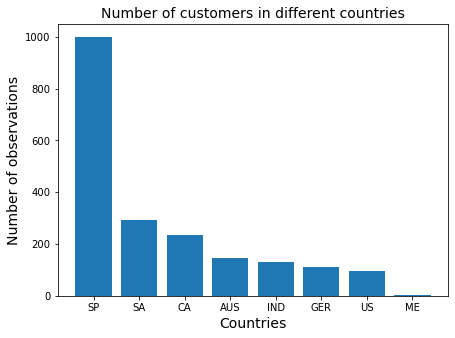

In [113]:
fig, ax = plt.subplots(figsize=(7,5))
plt.title("Number of customers in different countries", fontsize=14)
plt.bar(x=df['Country'].value_counts().index, height=df['Country'].value_counts().values);
plt.xlabel('Countries', fontsize = 14)
plt.ylabel('Number of observations', fontsize = 14)

На данном графике можно посмотреть количество человек в разных странах, которые совершают покупки. Больше всего людей в Испании, около тысячи, а меньше всего в Черногории. Количество человек из Южной Африки на втором месте, количество людей из остальных стран не больше 300 из каждой.

Text(0, 0.5, 'Number of observations')

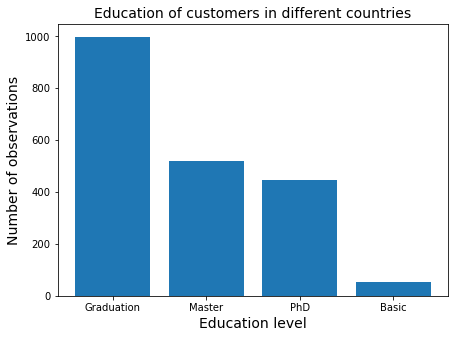

In [114]:
fig, ax = plt.subplots(figsize=(7,5))
plt.title("Education of customers in different countries", fontsize=14)
plt.bar(x=df['Education'].value_counts().index, height=df['Education'].value_counts().values);
plt.xlabel('Education level', fontsize = 14)
plt.ylabel('Number of observations', fontsize = 14)

Больше всего данных представленно людьми с образованием "Graduation", меньше всего людей с с образованием "Basic". Мастеров и Докторов около 500 человек.

График №2

In [115]:
forpie = df.groupby('Education')[['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']].mean()

In [116]:
forpie = forpie.transpose()

In [117]:
forpie

Education,Basic,Graduation,Master,PhD
MntWines,3.075472,261.028056,264.592664,393.771300
MntFruits,9.018868,24.844689,21.299228,18.825112
MntMeatProducts,9.358491,153.369739,142.333977,161.228700
MntFishProducts,13.452830,35.340681,31.175676,26.217489
MntSweetProducts,9.905660,28.702405,23.235521,19.441704
MntGoldProds,22.698113,45.867735,38.660232,30.260090


Text(0.5, 1.0, 'Pie Chart for education degree "Basic" and mean amount of money spent on different categories (in %)')

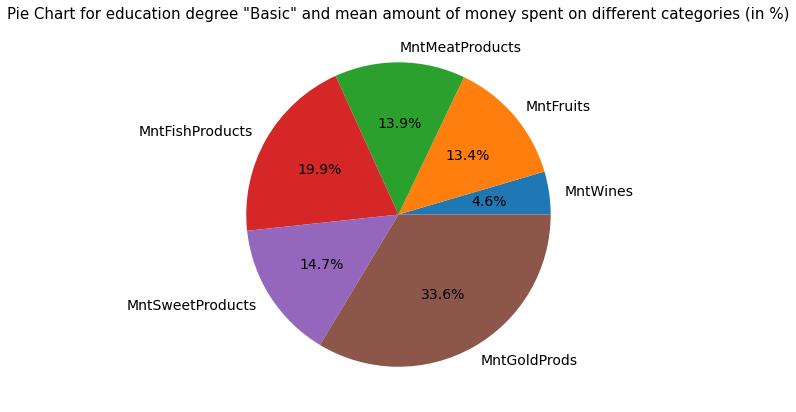

In [118]:
fig, ax = plt.subplots(figsize=(7,7))
plt.pie(forpie['Basic'], labels =['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds'], autopct = '%1.1f%%', textprops={'fontsize': 14}) # Функция для изменения размера подписей на круговой диаграмме была взята здесь https://stackoverflow.com/questions/7082345/how-to-set-the-labels-size-on-a-pie-chart-in-python
plt.title('Pie Chart for education degree "Basic" and mean amount of money spent on different categories (in %)', fontsize = 15)

Данная диаграмма позволяет посмотреть пропорции средних затрат по категориям товаров у людей с образованием "Basic". Можно заметить, что самая большая пропорция у "MntGoldProds". На втором месте находятся рыбные продукты, у мясных продуктов, сладких продуктов и фруктов примерно одинаковые доли, а вот средняя доля затрат на вино мала. 

Text(0.5, 1.0, 'Pie Chart for education degree "Graduation" and mean amount of money spent on different categories (in %)')

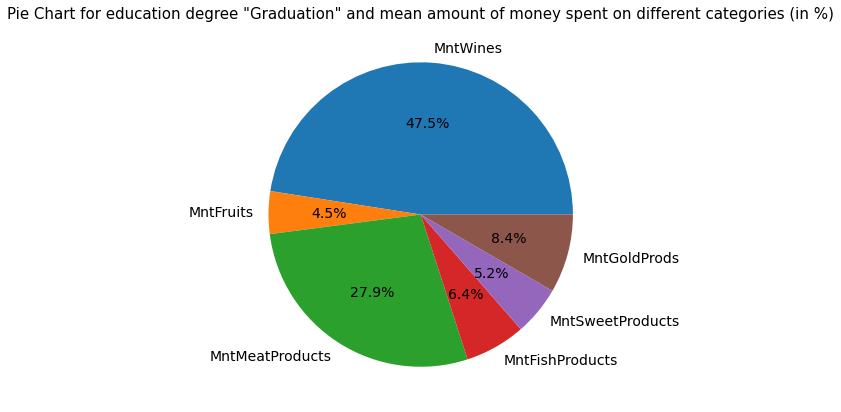

In [119]:
fig, ax = plt.subplots(figsize=(7,7))
plt.pie(forpie['Graduation'], labels =['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds'], autopct = '%1.1f%%', textprops={'fontsize': 14}) #https://stackoverflow.com/questions/7082345/how-to-set-the-labels-size-on-a-pie-chart-in-python
plt.title('Pie Chart for education degree "Graduation" and mean amount of money spent on different categories (in %)', fontsize = 15)

Данная диаграмма позволяет посмотреть пропорции средних затрат по категориям товаров у людей с образованием "Graduation". В отличие от предыдущего графика пропорции сильно отличаются. Почти 50% средних затрат идут на вино, затем на мясные продукты, около 28%. у остальных товаров доли в диапазоне от 4 до 9 процентов.

Text(0.5, 1.0, 'Pie Chart for education degree "Master" and mean amount of money spent on different categories (in %)')

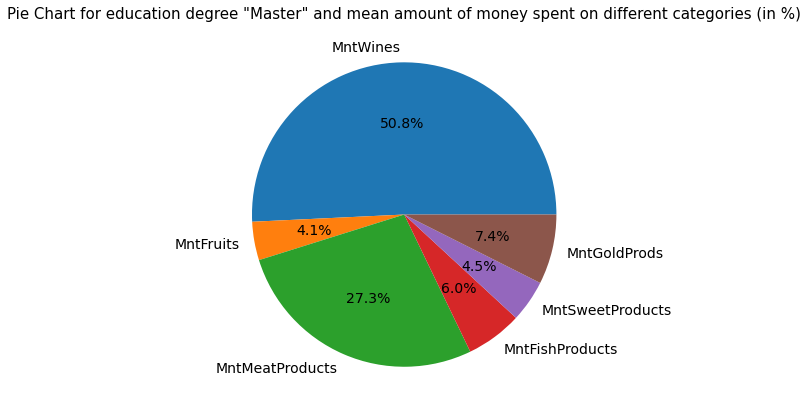

In [120]:
fig, ax = plt.subplots(figsize=(7,7))
plt.pie(forpie['Master'], labels =['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds'], autopct = '%1.1f%%', textprops={'fontsize': 14}) #https://stackoverflow.com/questions/7082345/how-to-set-the-labels-size-on-a-pie-chart-in-python
plt.title('Pie Chart for education degree "Master" and mean amount of money spent on different categories (in %)', fontsize = 15)

Данная диаграмма позволяет посмотреть пропорции средних затрат по категориям товаров у людей с образованием "Master". Здесь также доля вин преобладает, чуть больше 50%, доля трат на мясные продукты остается около 28%, траты по остальным категориям в диапазоне 4-8 процентов.

Text(0.5, 1.0, 'Pie Chart for education degree "PhD" and mean amount of money spent on different categories (in %)')

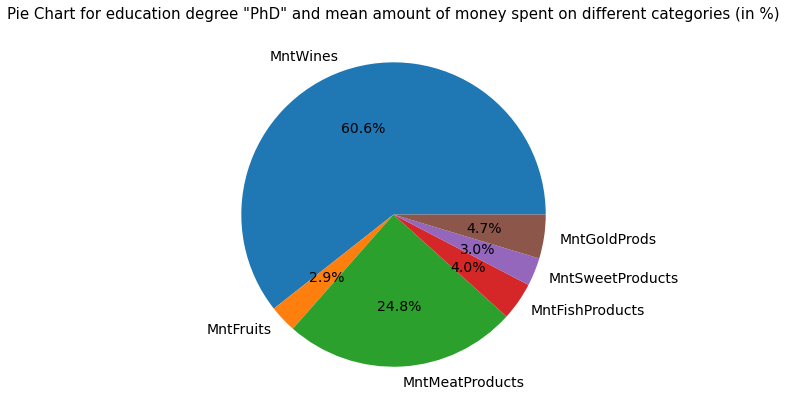

In [121]:
fig, ax = plt.subplots(figsize=(7,7))
plt.pie(forpie['PhD'], labels =['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds'], autopct = '%1.1f%%', textprops={'fontsize': 14}) #https://stackoverflow.com/questions/7082345/how-to-set-the-labels-size-on-a-pie-chart-in-python
plt.title('Pie Chart for education degree "PhD" and mean amount of money spent on different categories (in %)', fontsize = 15)

Данная диаграмма позволяет посмотреть пропорции средних затрат по категориям товаров у людей с образованием "PhD". У докторов наук доля средних трат на вино становится еще больше и достигает 60,6%. Доля средних затрат на мясные продукты уменьшилась до 24,8%, а доли по остальынм товарам и вовсе в диапазоне от 2,9% до 4,7%.

В целом, круговых диаграмм мало, чтобы делать какие либо более серьезные выводы, она позволяет лишь сориентироваться в том, на какие категории люди с разным типом образования тратят в среднем деньги. 

График №3

Text(0.5, 1.0, 'Scatter plot for types of marital state and amount of money spent on gold products')

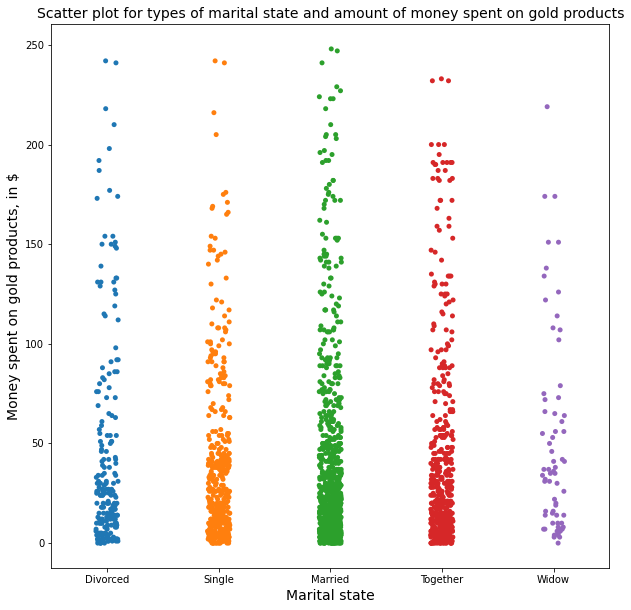

In [124]:
fig, ax = plt.subplots(figsize=(10, 10))
sns.stripplot(data = df, x = 'Marital_Status', y = 'MntGoldProds');
plt.xlabel('Marital state', fontsize = 14)
plt.ylabel('Money spent on gold products, in $', fontsize = 14)
plt.title('Scatter plot for types of marital state and amount of money spent on gold products', fontsize = 14)

По данному графику можно сделать вывод, что люди, состоящие в разных отношениях, в общем тратят от 0 до 250 долларов на золотые товары, при этом меньше всего наблюдений по вдовам, больше всего по женатым людям. Самое большое количество денег потраченное на золотые товары за период можно увидеть именно у женатого человека, около 250 долларов. 

График №4

Text(0, 0.5, 'Countries')

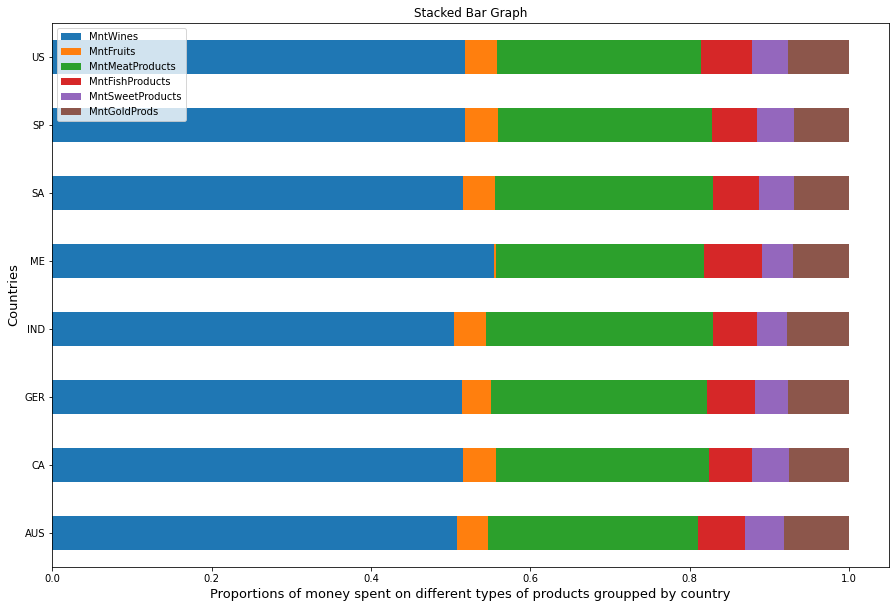

In [125]:
fn = df.groupby('Country')[['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']].sum()
fn.to_csv('mydataforplot', encoding = 'UTF-8')
fn = pd.read_csv('mydataforplot')
fn[['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']] = fn[['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']].apply(lambda x: x/x.sum(), axis=1)


plt.rcParams["figure.figsize"] = (15, 10)
yass = fn.plot(x = 'Country', kind = 'barh', stacked = True, title = 'Stacked Bar Graph',  mark_right = True)
yass.set_xlabel('Proportions of money spent on different types of products groupped by country', fontsize = 13)
yass.set_ylabel('Countries', fontsize = 13)

Здесь видно процентное соотношение денег, потраченнных на разные товары по странам. Можно сделать вывод, что в процентном соотношении люди из разных стран тратят примерно одинаковые суммы на одни и те же категории товаров. Немного выделяется Черногория, но это потому что оттуда данные только по трем людям.

График №5

Text(0.5, 1.0, 'Correlation heatmap')

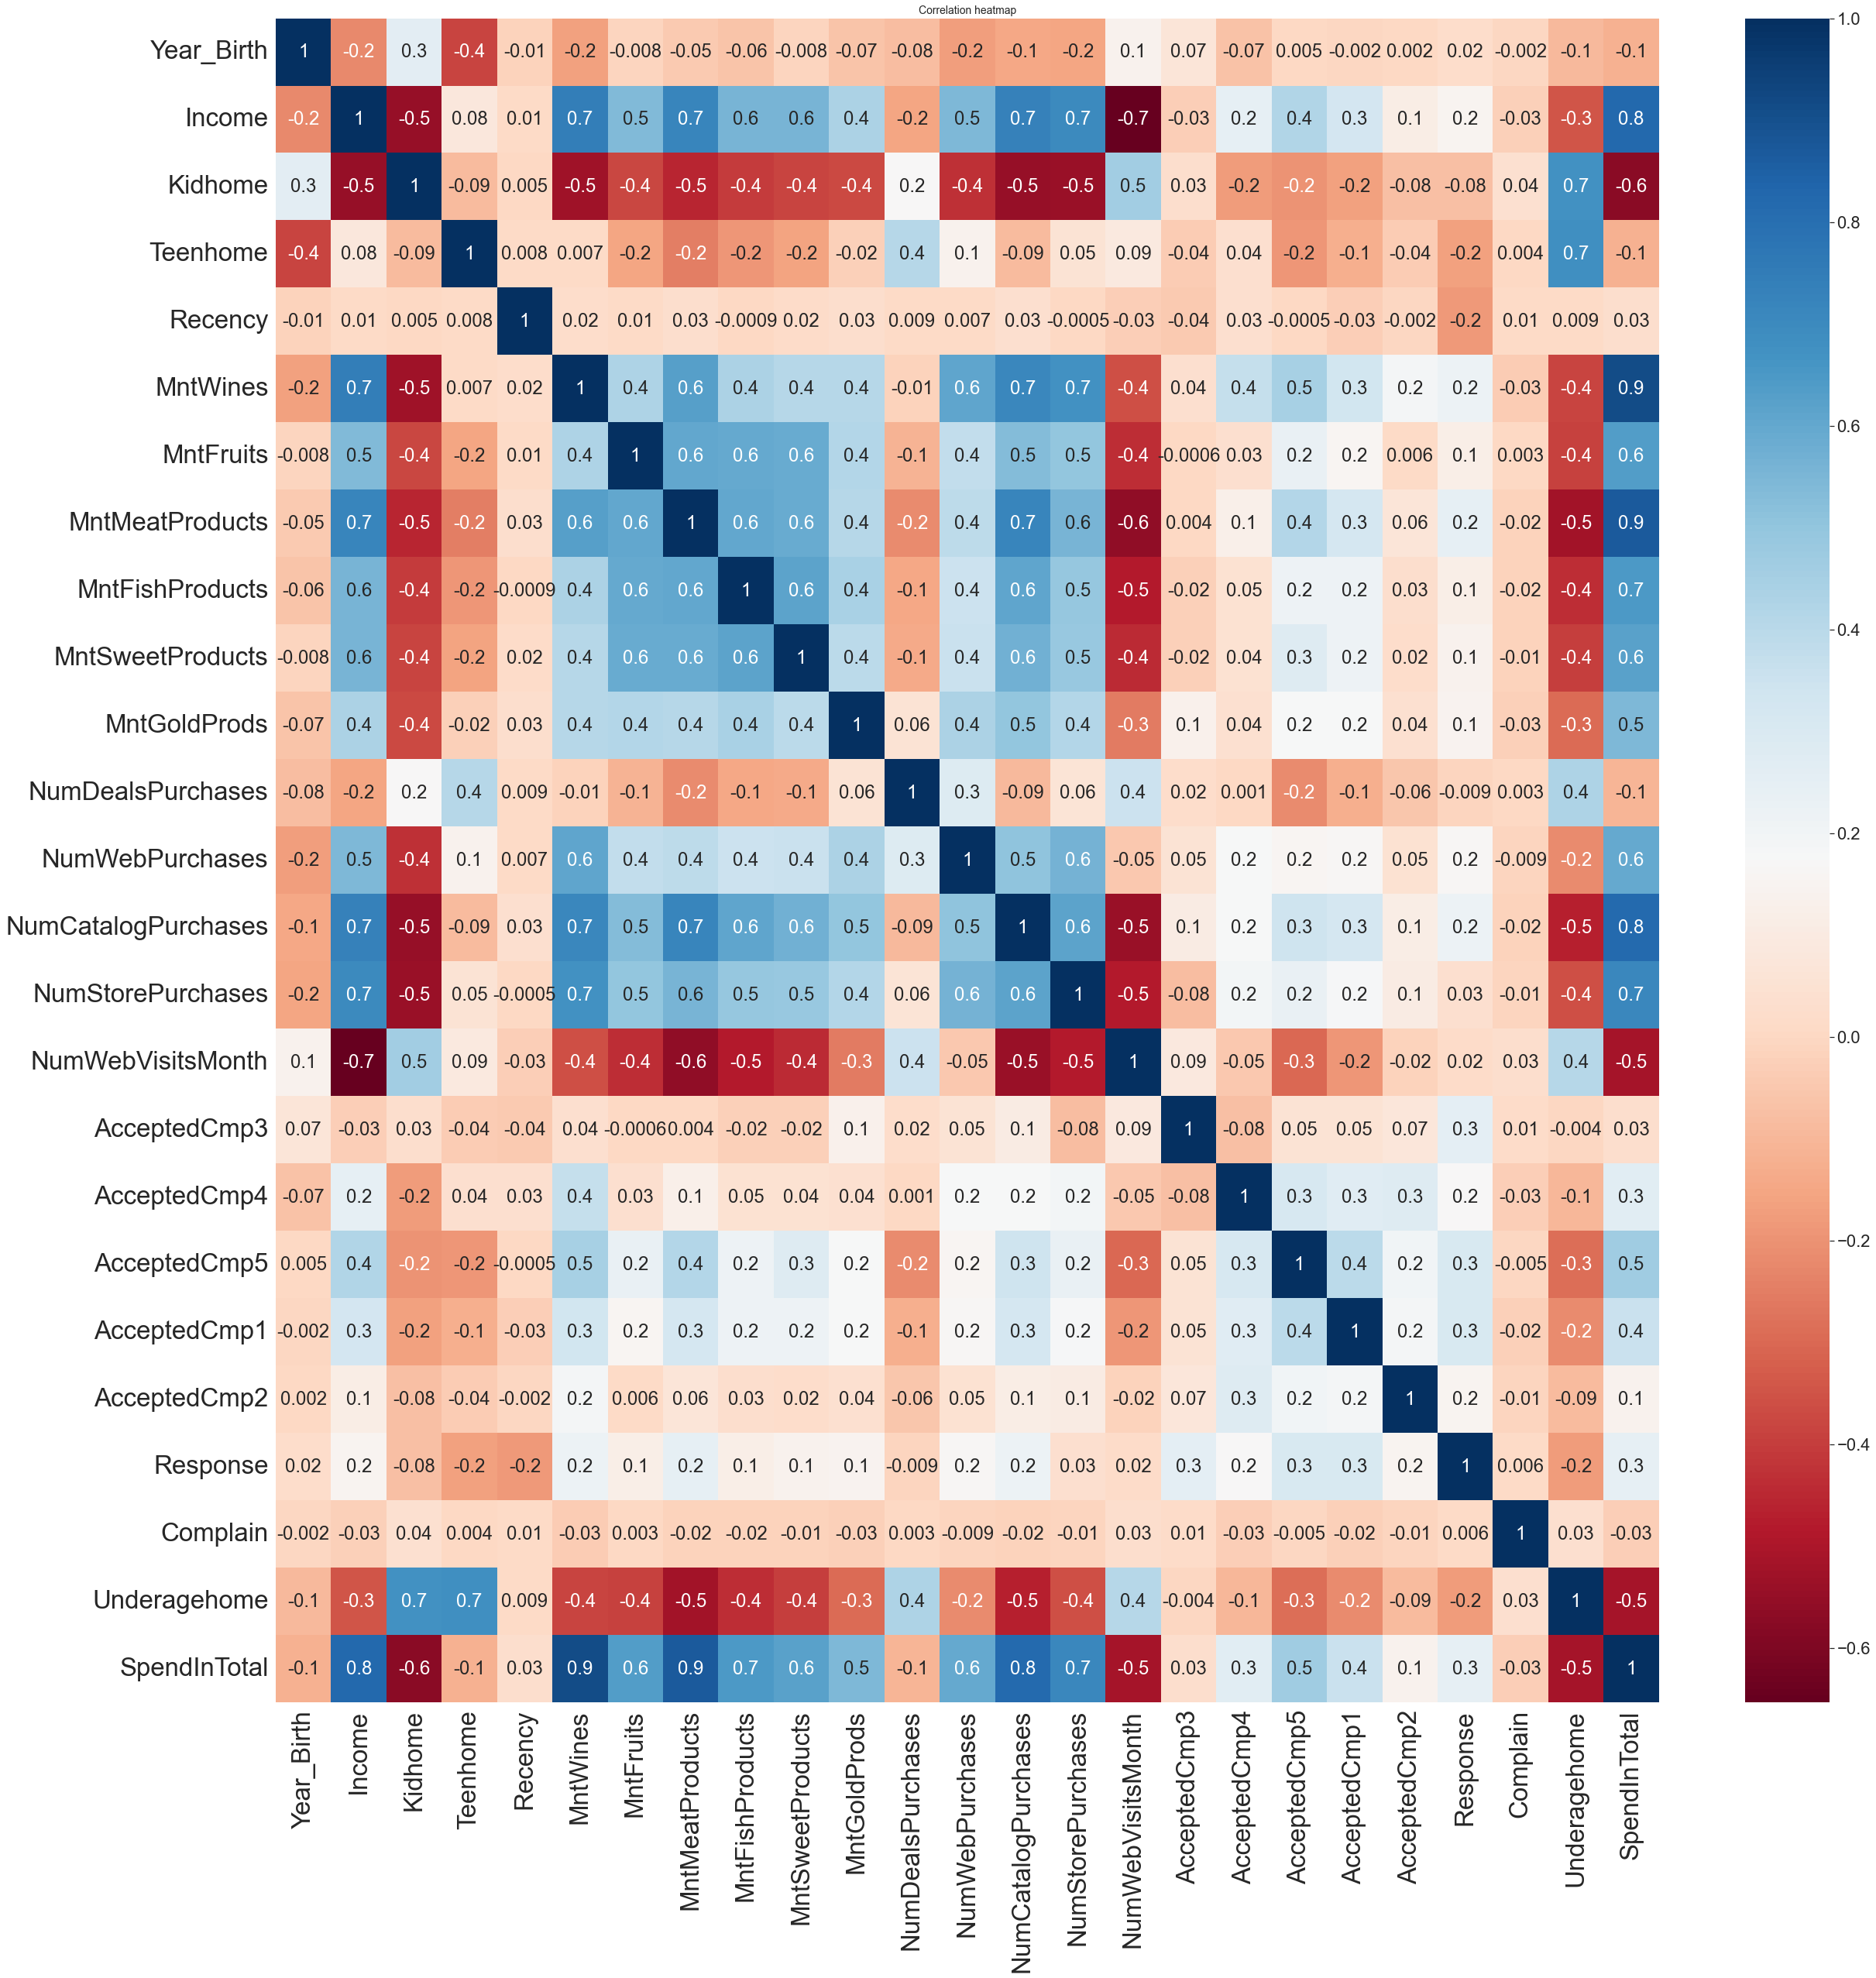

In [146]:
fig, ax = plt.subplots(figsize=(40, 40))
sns.set(font_scale = 2) 

sns.heatmap(df.corr(), cmap = 'RdBu', annot = True, fmt = '.1g')
plt.title('Correlation heatmap', fontsize = 14)

На тепловой карте корреляций можно поподробнее посмотреть на взаимосвязь величин друг с другом, самая сильная корреляция показана темно синим, самая слабая - темно красным. Так как самые сильные корреляции я уже выводила ранее, посмотрю по карте на самые слабые корреляции. 1. Корреляция Recency NumStorePurchases, то есть практически отсутствует зависимость между количеством дней с последней покупки и количеством покупок в магазине. 2. Корреляция Recency и AcceptedCmp, зависимость количества дней с последней покупки и участия в маркетинговой кампании №5 также крайне мала. 3. Корреляция AcceptedCmp3 и MntFruits, что свидетельствует об очень малой зависимости участия в маркетинговой кампании №3 и суммой денег, потраченной на фрукты.

P.S. Размер текста внутри тепловой матрицы и размер названия матрицы менялся каждый раз при прощелкивании ячейки, я не поняла с чем это связано, на всех справочных ресурсах речь идет только о функции set. но она не особо помогла :''(
https://ask-dev.ru/info/454894/auto-adjust-font-size-in-seaborn-heatmap

## Задание 7 (1 балл): немного исследований

Попробуйте найти в данных какую-то классную интересную особенность. Может быть, рыбу едят только неженатые? Или самый большой заработок и потребление фруктов у людей без образования? Приведите все расчеты, и визуализации для обнаруженного факта. Он должен быть правда интересным и удивлять! Попробуйте описать, почему (как вам кажется) так получилось.

Интересный факт - газоны в России делают неправильно. На самом деле тротуар должен быть выше уровня травы, а трава, соответвенно, ниже уровня тротуара. Таким образом земля и прочая грязь не скапливается на тротуаре, и дорога выглядит опрятной.

Ладно, если серьезно, мне стало интересно сгруппировать данные по статусу отношений и сумме денег, потраченной на вино и вывести описательные статистики. Просто потому что правда интересно, какие показатели получатся. 

In [156]:
wine = df.groupby('Marital_Status')['MntWines'].agg(['mean', 'min', 'max'])
wine

,mean,min,max
Marital_Status,,,
Divorced,305.919811,0.0,1296.0
Married,279.074264,0.0,1394.0
Single,282.004577,0.0,1332.0
Together,279.034816,0.0,1396.0
Widow,338.838235,1.0,1298.0


Text(0, 0.5, 'Money spent in $')

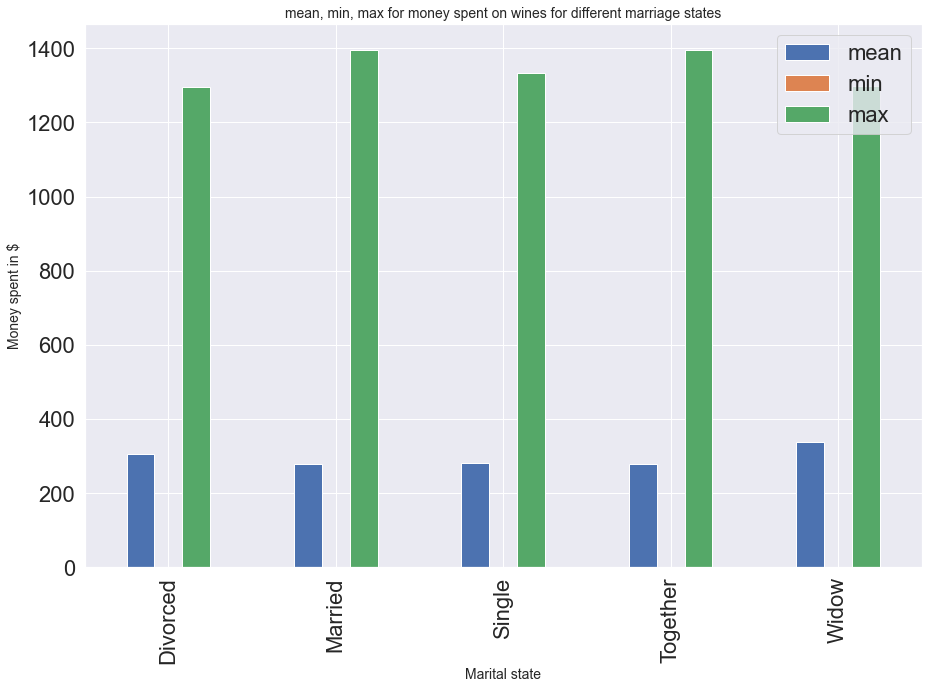

In [157]:
wine.plot(kind = 'bar')
plt.title('mean, min, max for money spent on wines for different marriage states', fontsize = 14)
plt.xlabel('Marital state', fontsize = 14)
plt.ylabel('Money spent in $', fontsize = 14)

Итак, получилось, что в среднем бОльшую сумму на вино тратят вдовы (Это мой интересный факт!!!). Кроме того, у всех минимальное значение 0, а у вдов 1. Может быть они горюют и запивают одиночество алкоголем. На втором месте по средней сумме разведенные люди. Тоже, видимо, запивают одиночество. 

Тем не менее, макисмальная сумма трат достигли в группах "вместе" и "женаты". 

Я предполагаю, что такая ситуация со средним у вдов получилась из-за того, что в этой группе бОльшее людей покупает вино по цене, высокой, ну или выше среднего, то есть разброс данных меньше и таким образом при расчетах среднее получилось довольно высоким.